In [ ]:
import pandas as pd
import numpy as np
#import xlsxwriter


path=('ds_project.xlsx')
xl = pd.ExcelFile(path)

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
%matplotlib inline

In [8]:
print(xl.sheet_names)

df= xl.parse('Sheet1')
df.head(10)


['Sheet1', 'Sheet2', 'Sheet3']


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.35,3.49,3.10,0.74,11.68,NaN,NaN,NaN,NaN,NaN,NaN
3,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN,NaN,NaN,NaN
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.0,39.0,5.7,1443.0,Sledgehammer Games,M
6,FIFA 17,PS4,2016,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.0,41.0,5.0,398.0,"EA Sports, EA Vancouver",E
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55,NaN,NaN,NaN,NaN,NaN,NaN
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.59,2.11,0.01,0.68,7.39,NaN,NaN,NaN,NaN,NaN,NaN
9,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.0,58.0,6.5,4228.0,Bethesda Game Studios,M


In [ ]:
df[df.isnull().any(axis=1)]
df.isnull().sum()


Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            2
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       975
Critic_Count       975
User_Score         805
User_Count         805
Developer          689
Rating             751
dtype: int64

In [ ]:
df['Critic_Score'] = df['Critic_Score'].fillna((df['Critic_Score'].mean()))
df['Critic_Count'] = df['Critic_Count'].fillna((df['Critic_Count'].mean()))
df['User_Count'] = df['User_Count'].fillna((df['User_Count'].mean()))


In [ ]:
df.User_Score.dtype


dtype('float64')

In [ ]:
df['User_Score'] = df['User_Score'].fillna((df['User_Score'].mean()))

df.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,72.306407,30.637883,6.623536,342.925676,NaN,NaN
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.000000,66.000000,8.300000,2899.000000,Rockstar North,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.35,3.49,3.10,0.74,11.68,72.306407,30.637883,6.623536,342.925676,NaN,NaN
3,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.000000,42.000000,4.300000,896.000000,EA Sports,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.99,3.49,0.22,1.28,7.98,72.306407,30.637883,6.623536,342.925676,NaN,NaN
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.000000,39.000000,5.700000,1443.000000,Sledgehammer Games,M
6,FIFA 17,PS4,2016,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.000000,41.000000,5.000000,398.000000,"EA Sports, EA Vancouver",E
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55,72.306407,30.637883,6.623536,342.925676,NaN,NaN
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.59,2.11,0.01,0.68,7.39,72.306407,30.637883,6.623536,342.925676,NaN,NaN
9,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.000000,58.000000,6.500000,4228.000000,Bethesda Game Studios,M


In [ ]:
df.isnull().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            2
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score           0
User_Count           0
Developer          689
Rating             751
dtype: int64

In [ ]:
df.fillna(method='ffill', inplace=True)

In [ ]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,72.306407,30.637883,6.623536,342.925676,NaN,NaN
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.000000,66.000000,8.300000,2899.000000,Rockstar North,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.35,3.49,3.10,0.74,11.68,72.306407,30.637883,6.623536,342.925676,Rockstar North,M
3,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.000000,42.000000,4.300000,896.000000,EA Sports,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.99,3.49,0.22,1.28,7.98,72.306407,30.637883,6.623536,342.925676,EA Sports,E
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.000000,39.000000,5.700000,1443.000000,Sledgehammer Games,M
6,FIFA 17,PS4,2016,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.000000,41.000000,5.000000,398.000000,"EA Sports, EA Vancouver",E
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55,72.306407,30.637883,6.623536,342.925676,"EA Sports, EA Vancouver",E
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.59,2.11,0.01,0.68,7.39,72.306407,30.637883,6.623536,342.925676,"EA Sports, EA Vancouver",E
9,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.000000,58.000000,6.500000,4228.000000,Bethesda Game Studios,M


In [ ]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          1
Rating             1
dtype: int64

In [ ]:
cols=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','Critic_Count','User_Score','User_Count']

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [ ]:
for i in cols:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])

In [ ]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,143,132,33,67,226,41,27,52,209,NaN,NaN
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,140,134,35,66,225,65,62,69,367,Rockstar North,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,141,129,60,55,224,41,27,52,209,Rockstar North,M
3,FIFA 16,PS4,2015,Sports,Electronic Arts,93,133,6,65,223,51,39,28,300,EA Sports,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,136,129,22,65,222,41,27,52,209,EA Sports,E
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,134,128,14,64,221,52,36,42,335,Sledgehammer Games,M
6,FIFA 17,PS4,2016,Sports,Electronic Arts,65,131,8,62,220,54,38,35,228,"EA Sports, EA Vancouver",E
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,139,98,56,43,219,41,27,52,209,"EA Sports, EA Vancouver",E
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,142,118,1,52,218,41,27,52,209,"EA Sports, EA Vancouver",E
9,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,129,127,24,63,217,56,55,50,377,Bethesda Game Studios,M


In [ ]:
for i in cols:                                  #standardization of data
    df[i]=(df[i]-df[i].mean())/df[i].std()

In [ ]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,4.946975,5.038574,3.548783,6.577938,4.189395,0.002522,0.009945,0.004914,0.547774,NaN,NaN
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,4.832474,5.122745,3.794031,6.473192,4.168065,3.015974,2.339185,1.463098,2.220277,Rockstar North,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.870641,4.912317,6.859632,5.320991,4.146735,0.002522,0.009945,0.004914,0.547774,Rockstar North,M
3,FIFA 16,PS4,2015,Sports,Electronic Arts,3.038639,5.080659,0.237933,6.368447,4.125405,1.258127,0.808542,-2.053697,1.511051,EA Sports,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,4.679807,4.912317,2.199918,6.368447,4.104076,0.002522,0.009945,0.004914,0.547774,EA Sports,E
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,4.603474,4.870231,1.218925,6.263701,4.082746,1.383687,0.608893,-0.852840,1.881542,Sledgehammer Games,M
6,FIFA 17,PS4,2016,Sports,Electronic Arts,1.969971,4.996488,0.483181,6.054210,4.061416,1.634808,0.741992,-1.453269,0.748898,"EA Sports, EA Vancouver",E
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,4.794308,3.607660,6.369136,4.064043,4.040087,0.002522,0.009945,0.004914,0.547774,"EA Sports, EA Vancouver",E
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.908808,4.449374,-0.375188,5.006754,4.018757,0.002522,0.009945,0.004914,0.547774,"EA Sports, EA Vancouver",E
9,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,4.412640,4.828145,2.445166,6.158956,3.997427,1.885930,1.873337,-0.166637,2.326131,Bethesda Game Studios,M


In [ ]:
df.mean()

Year_of_Release    2.014960e+03
NA_Sales           4.043756e-15
EU_Sales          -2.144639e-15
JP_Sales           1.040777e-15
Other_Sales        1.790456e-15
Global_Sales      -1.152979e-15
Critic_Score       2.151266e-15
Critic_Count       3.247449e-15
User_Score        -5.122711e-17
User_Count         1.416469e-17
dtype: float64

In [ ]:
df.std()

Year_of_Release    0.812603
NA_Sales           1.000000
EU_Sales           1.000000
JP_Sales           1.000000
Other_Sales        1.000000
Global_Sales       1.000000
Critic_Score       1.000000
Critic_Count       1.000000
User_Score         1.000000
User_Count         1.000000
dtype: float64

In [ ]:
for i in cols:
    df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min()) #Normalization of data

In [ ]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,1.000000,0.985075,0.540984,1.000000,1.000000,0.630769,0.287234,0.658228,0.544271,NaN,NaN
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,0.979021,1.000000,0.573770,0.985075,0.995575,1.000000,0.659574,0.873418,0.955729,Rockstar North,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,0.986014,0.962687,0.983607,0.820896,0.991150,0.630769,0.287234,0.658228,0.544271,Rockstar North,M
3,FIFA 16,PS4,2015,Sports,Electronic Arts,0.650350,0.992537,0.098361,0.970149,0.986726,0.784615,0.414894,0.354430,0.781250,EA Sports,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,0.951049,0.962687,0.360656,0.970149,0.982301,0.630769,0.287234,0.658228,0.544271,EA Sports,E
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,0.937063,0.955224,0.229508,0.955224,0.977876,0.800000,0.382979,0.531646,0.872396,Sledgehammer Games,M
6,FIFA 17,PS4,2016,Sports,Electronic Arts,0.454545,0.977612,0.131148,0.925373,0.973451,0.830769,0.404255,0.443038,0.593750,"EA Sports, EA Vancouver",E
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,0.972028,0.731343,0.918033,0.641791,0.969027,0.630769,0.287234,0.658228,0.544271,"EA Sports, EA Vancouver",E
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,0.993007,0.880597,0.016393,0.776119,0.964602,0.630769,0.287234,0.658228,0.544271,"EA Sports, EA Vancouver",E
9,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,0.902098,0.947761,0.393443,0.940299,0.960177,0.861538,0.585106,0.632911,0.981771,Bethesda Game Studios,M


In [ ]:
import matplotlib


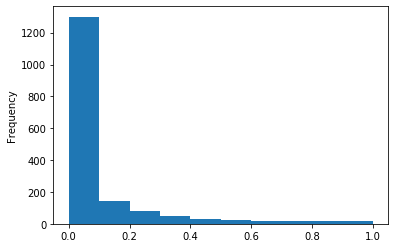

In [ ]:
df['NA_Sales'].plot.hist()

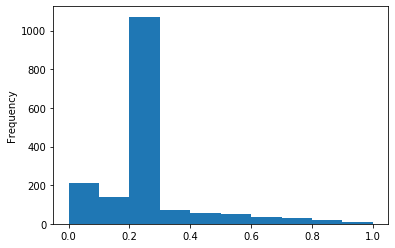

In [ ]:
df['Critic_Count'].plot.hist()

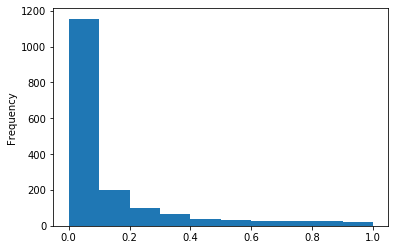

In [ ]:
df['Global_Sales'].plot.hist()

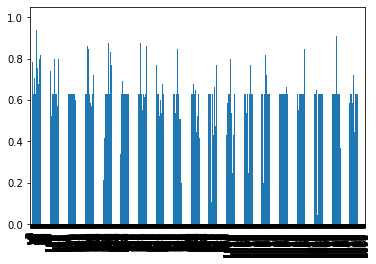

In [ ]:
df['Critic_Score'].plot.bar()

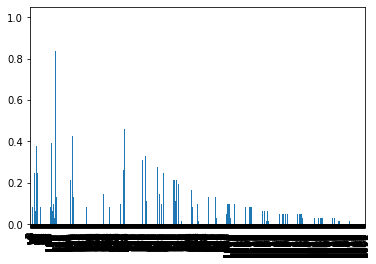

In [ ]:
df['JP_Sales'].plot.bar()

In [ ]:
qqplot(df['Critic_Count'],line='s')

NameError: ignored

In [ ]:
qqplot(df['Other_Sales'],line='s')

NameError: ignored

In [ ]:
df['Year_of_Release'].describe()

count    1693.000000
mean     2014.959835
std         0.812603
min      2014.000000
25%      2014.000000
50%      2015.000000
75%      2016.000000
max      2020.000000
Name: Year_of_Release, dtype: float64

In [ ]:
years=[2014,2015]
year_ptr=df['Year_of_Release'].isin(years)

In [ ]:
year_ptr.describe()

count     1693
unique       2
top       True
freq      1187
Name: Year_of_Release, dtype: object

In [ ]:
df['Platform'].value_counts()

PS4     377
PSV     297
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
DS        1
Name: Platform, dtype: int64

In [ ]:
j=pd.DataFrame(df['Platform'].value_counts())
j

,Platform
PS4,377
PSV,297
XOne,228
PS3,219
3DS,212
PC,151
X360,111
WiiU,73
PSP,13
Wii,11


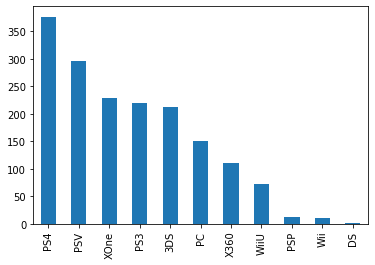

In [ ]:
j['Platform'].plot.bar()

In [ ]:
j=pd.DataFrame(df['NA_Sales'].value_counts())
j

,NA_Sales
0.00,711
0.01,87
0.03,87
0.02,83
0.05,58
...,...
1.14,1
2.08,1
1.46,1
2.99,1


In [ ]:
j=pd.DataFrame(df['Platform'].value_counts())
j


,Platform
PS4,377
PSV,297
XOne,228
PS3,219
3DS,212
PC,151
X360,111
WiiU,73
PSP,13
Wii,11


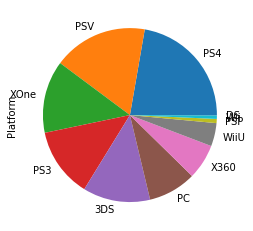

In [ ]:
ids.whatever.value_counts().plot(kind='pie')

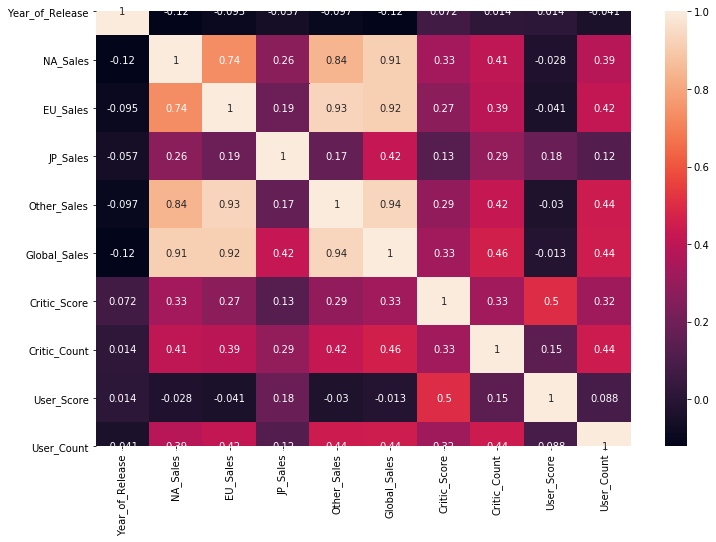

In [41]:
plt.figure(figsize=(12, 8))

vg_corr = df.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

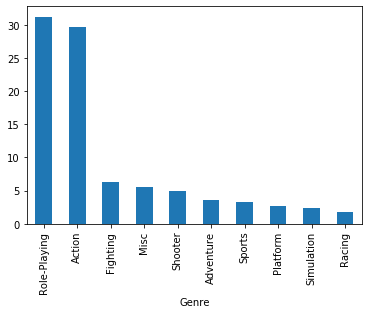

In [9]:
df.groupby('Genre').sum().unstack().JP_Sales.sort_values(ascending=False).head(10).plot(kind='bar');

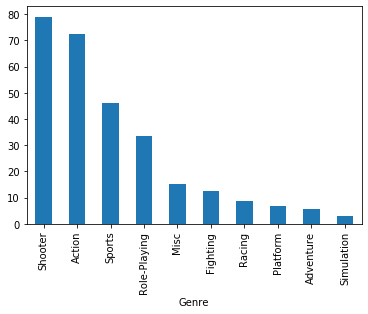

In [10]:
df.groupby('Genre').sum().unstack().NA_Sales.sort_values(ascending=False).head(10).plot(kind='bar');

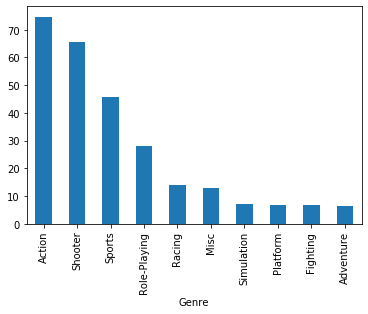

In [11]:
df.groupby('Genre').sum().unstack().EU_Sales.sort_values(ascending=False).head(10).plot(kind='bar');

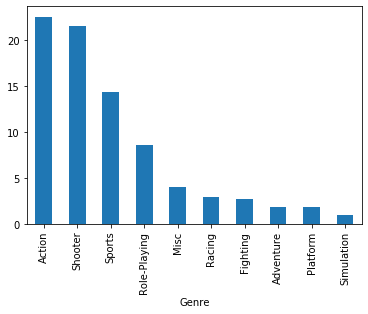

In [12]:
df.groupby('Genre').sum().unstack().Other_Sales.sort_values(ascending=False).head(10).plot(kind='bar');